In [1]:
import tonic

nmnist = tonic.datasets.NMNIST("/DATA/hwkang", train=False)
events, label = nmnist[0]


/home/hwkang/jupyter/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


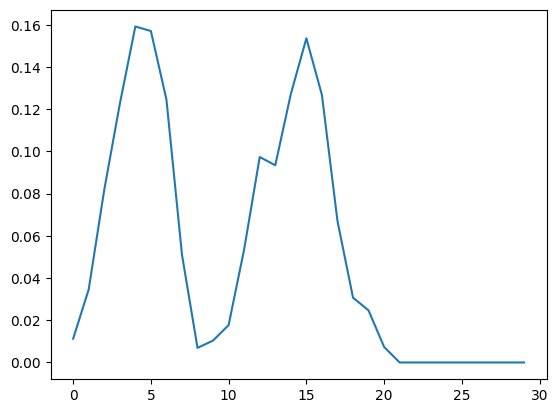

In [2]:
transform = tonic.transforms.Compose(
    [
        tonic.transforms.DropEventByTime(duration_ratio=0.3),
        tonic.transforms.ToFrame(
            sensor_size=nmnist.sensor_size,
            time_window=10000,
        ),
    ]
)

frames = transform(events)

list_avg_pixel = []
for i in range(len(frames)):
    avg_pixel = frames[i].mean()
    list_avg_pixel.append(avg_pixel)

import matplotlib.pyplot as plt
plt.plot(list_avg_pixel)

- 픽셀 값이 연속적으로 0으로 존재하는 지점이 존재

`tonic.transforms.DropEventByTime`을 사용하면 라벨 생성에 대한 기준을 수립할 수 있을 것 같음

(e.g.) 픽셀값이 연속적으로 0인 구간의 시작 프레임을 라벨로 설정

이러한 방법은 transforms 없이도 구현할 수 있을 것으로 예상